# Facial Recognition with KNN algorithm

## Useful libraries importation

In [3]:
import pandas as pd
import numpy as np
import numpy.linalg as linalg
import matplotlib.pylab as pylab

## Face images importation with sklearn

In [4]:
from sklearn.datasets import fetch_lfw_people
lfw_dataset = fetch_lfw_people(min_faces_per_person=200) # To keep people who got 200 images or more
import time as time # To calculate time execution
from sklearn.model_selection import train_test_split # To split data

## Definition of images height, width, vectors and names

In [5]:
img_height = 62 # Images height in pixels
img_width = 47 # Images width in pixels
X = lfw_dataset.data # Line vector of image grey levels
y = lfw_dataset.target # Images labels
names = lfw_dataset.target_names # Peoples name
print(lfw_dataset.images.shape)

(766, 62, 47)


Each photo is encoded in a line vector of 2914 numbers between 0 and 255 (8 bits) which represents pixels grey levels. 766 photos are regrouped in the $X$ matrix. The $X$ matrix have a shape of 766 $\times$ 2914.
The $y$ vector contains photos labels. y=1 if it's a G.W picture and y=0 if it's a C. Powel picture.

The `imshow` function is use to resize the line vector $X[i,:]$ indicating width, height and black and white encoding with the `cmap=plt.cm.gray` option

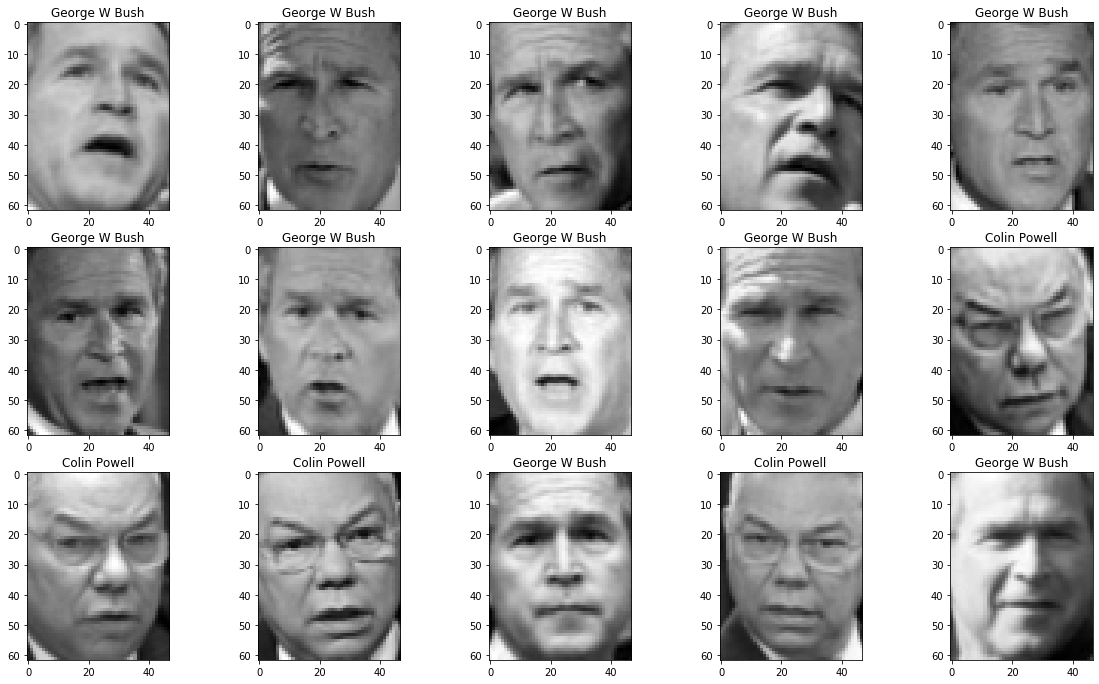

The labels of above images are : [1 1 1 1 1 1 1 1 1 0 0 0 1 0 1] (y=1) for George W Bush and (y=0) for Colin Powell


In [11]:
# We only show the first images of the X dataset, with the corresponding names
pylab.figure(figsize=(20,20))
for i in range(15):
    pylab.subplot(5,5,i+1)
    pylab.imshow(X[i,:].reshape((img_height, img_width)), cmap=pylab.plt.cm.gray) # figure's display
    pylab.title(names[y[i]])
pylab.show()
print(f'The labels of above images are : {y[0:15]} (y=1) for {names[1]} and (y=0) for {names[0]}')

We seperate the dataset randomly in two parts. We train our algorithm with `X_train` and `y_train` then test it on `X_test` and `y_test`.
The `test_size` variable specify the proportion of the test data wished.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

The `distance` function take 2 images (as vectors) and return the euclidian distance between these 2 images.The `distance` function take 2 images (as vectors) and return the euclidian distance between these 2 images.

Prediction from on `X_train` and `y_train`, the images labels of `X_test` by using the *KNN* algorithm. The prediction values are stocked in the y_pred vector.

Then we compare time execution by using the `time` function to display the duration of the algorithm

In [ ]:
n_test = X_test.shape[0] # number of individuals in the test sample
n_train = X_train.shape[0] # number of individuals in the train sample
y_pred = np.zeros(n_test) # Initialization of the predictions vector
t1=time()
for i in range(n_test):
    mini_index=0
    for j in range(n_train):
        if (distance(X_test[i,:],X_train[j,:])<distance(X_test[i,:],X_train[mini_index,:])):
            mini_index=j
    y_pred[i]=y_train[mini_index]
t2=time()
print(t2-t1)

What is the proportion of good classifications ?
The algorithm is more efficient to detect G. W. Bush or C. Powel

In [ ]:
print('Percentage of good classifications :', 1-sum((y_pred-y_test)**2)/n_test)
print('Percentage of C. Powel detected :', 1-sum(y_pred[y_test==0])/sum(y_test==0))
print('Percentage of G. W. Bush detected :', sum(y_pred[y_test==1])/sum(y_test==1))

The images are represented by dots in a 2914 (pixels) space dimension. To find a subspace with a dimension $D < 2914$, we need to realize a ACP (Analyse des composantes principales) PCA.

The reduction of the dimension will allow us to :

* Save data storage space
* Gain computing time for facial recognition
* Improve on average the percentage of good classfication

First we use the `normalize` function which takes a $M$ matrix as an argument and returns a normalised matrix. 

In [ ]:
def normalise(M):
    n,p=M.shape
    N=zeros((n,p))
    for i in range(p):
        N[:,i]=(M[:,i]-mean(M[:,i]))/std(M[:,i])# To normalise each row
    return N

Then we use the `correlation` function which takes a $M$ matrix as an argument and return the correlation matrix associated to $M$.

In [ ]:
def correlation(M):
    Z= normalise(M)
    n=Z.shape[0]
    return 1/n*dot(Z.T,Z)

Finally, we use the `ACP` function which takes a $M$ matrix as an argument and returns the eigenvalues, the eigenvectors and the $P$ matrix.

In [ ]:
def acp(M):
    n,p=M.shape
    R= correlation(M)
    valtemp, vectemp = eigh(R) # valeurs propres et vecteurs propres de la matrice de corrélation
    val = sort(valtemp)[::-1] # valeurs propres par ordre décroissant
    index = argsort(valtemp)[::-1] # indice du réarrangement des valeurs propres par ordre décroissant
    P=zeros((p,p)) # matrice de changement de base ordonnée en fonction des valeurs propres
    for i in range(p):
        P[:,i]=vectemp[:,index[i]]
    C=dot(normalise(M),P)
    return val, P, C

### TODO Determine the number $D$ of eigenvalues necessary to explain 95% of the images variance and 90% of the images variance.

In [ ]:
valtemp, Ptemp = eigh(P)
valPropres = sort(valtemp)[::-1]
indexsort = argsort(valtemp)[::-1]
D=diag(valPropres)
#print(D)

Representation of the images generated in the $D$ space first main vectors.

Definition of the $C\_train$ matrix which contains the $D$ first main components for $X\_train$ and definition of $C\_test$ which contains the details of the $X\_test$ in this new space

In [ ]:
C_train = C[:,0:D.size]
C_test = dot(normalise(X_test),P)[:,0:D.size]
print(shape(C_train))
print(shape(C_test))
#print('Matrice C test \n', C_test,'Matrice C train \n' ,C_train)

Application of the  _**K nearest neighours algotithm**_. Determination of the new computation time, the new percentage of good classifications and the new detection percentage of G.W. Bush and C. Powell

In [ ]:
nc_test= C_test.shape[0] # number of individuals in the test sample
nc_train = C_train.shape[0] # number of individuals in the test sample
yc_pred = zeros(nc_test) # Initialization of the predictions vector
t1=time()
for i in range(n_test):
    mini_index=0
    for j in range(nc_train):
        if (distance(C_test[i,:],C_train[j,:])<distance(C_test[i,:],C_train[mini_index,:])):
            mini_index=j
    yc_pred[i]=y_train[mini_index]
t2=time()
print(t2-t1)

In [ ]:
print('Percentage of good classifications :', 1-sum((yc_pred-y_test)**2)/nc_test)
print('Percentage of C. Powell detected :', 1-sum(yc_pred[y_test==0])/sum(y_test==0))
print('Percentage of G.W Bush detected :', sum(yc_pred[y_test==1])/sum(y_test==1))

Application of the _**KNN algorithm**_  with another measurement of similarities between the images. This  measurement of dissimilarities between the $I1$ and $I2$ is : $1-\mathrm{correlation}(I1,I2)^2$

In [ ]:
def dissimilarite(I1,I2):
    return 1-corrcoef(I1,I2)[0,1]**2

Application of the _**KNN algorithm**_ with the `dissimilarite` function

In [ ]:
nd_test = X_test.shape[0] # number of individuals in the nd test sample
nd_train = X_train.shape[0] # number of individuals in the nd train sample
y_diss_pred = zeros(nd_test) # Initialization of the predictions vector
t1_diss=time()
for i in range(nd_test):
    mini_index_diss=0
    for j in range(nd_train):
        if (dissimilarite(X_test[i,:],X_train[j,:])<dissimilarite(X_test[i,:],X_train[mini_index,:])):
            mini_index_diss=j
    y_diss_pred[i]=y_train[mini_index_diss]
t2_diss=time()
print(t2_diss-t1_diss)

In [ ]:
print('Percentage of good classifications :', 1-sum((y_diss_pred-y_test)**2)/nd_test)
print('Percentage of C. Powell detected :', 1-sum(y_diss_pred[y_test==0])/sum(y_test==0))
print('Percentage of G.W Bush detected :', sum(y_diss_pred[y_test==1])/sum(y_test==1))

Application of the _**KNN Algorithm**_ with the `dissimilarite` function and the main components data

In [ ]:
nc_diss_test= C_test.shape[0] # nombre d'individus dans l'échantillon test
nc_diss_train = C_train.shape[0] # nombre d'individus dans l'échantillon train
yc_diss_pred = zeros(nc_test) # initialisation du vecteur des prédictions
t1=time()
for i in range(nc_diss_test):
    mini_index=0
    for j in range(nc_diss_train):
        if (dissimilarite(C_test[i,:],C_train[j,:])<dissimilarite(C_test[i,:],C_train[mini_index,:])):
            mini_index=j
    yc_diss_pred[i]=y_train[mini_index]
t2=time()
print(t2-t1)

In [ ]:
print('Percentage of good classifications :', 1-sum((yc_diss_pred-y_test)**2)/nc_diss_test)
print('Percentage of C. Powell detected :', 1-sum(yc_diss_pred[y_test==0])/sum(y_test==0))
print('Percentage of G.W Bush detected :', sum(yc_diss_pred[y_test==1])/sum(y_test==1))